# Assignment 6: Operators and Spatial filtering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
from PIL import Image
from skimage import filters
from matplotlib.gridspec import GridSpec
from scipy.ndimage import convolve
from skimage.transform import resize
from skimage import img_as_float
import cv2
from scipy.signal import convolve2d
from skimage.util import random_noise
from scipy.ndimage import median_filter
from scipy.ndimage import gaussian_filter

### 1. Operators
##### 1.1. Directions
##### Use the *skimage.filter* with ‘sobel’ and ‘prewitt’ options for filtering image “T”. Why saying that these filters are Sobel or Prewitt horizontal edge-emphasizing ones? Use transpose operator ‘ and rot90 function to define the kernel adapted to all directions. Call them North, South, West and East.

In [4]:
#Load image
image_T = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 6 - IP\\IP6\\IP6\\T.png").convert('L')

#To array
image_array_T = np.array(image_T)

#Application of Sobel e Prewitt filters for horizontal labels
sobel_horiz_T = filters.sobel_v(image_array_T)
prewitt_horiz_T = filters.prewitt_v(image_array_T)

#Defining kernels for Sobel in the 4 directions
sobel_kernels = {
    "North": filters.sobel_v(image_array_T),
    "South": np.flip(filters.sobel_v(image_array_T)),
    "West": np.rot90(filters.sobel_h(image_array_T), k=1),
    "East": np.rot90(filters.sobel_h(image_array_T), k=-1)
}

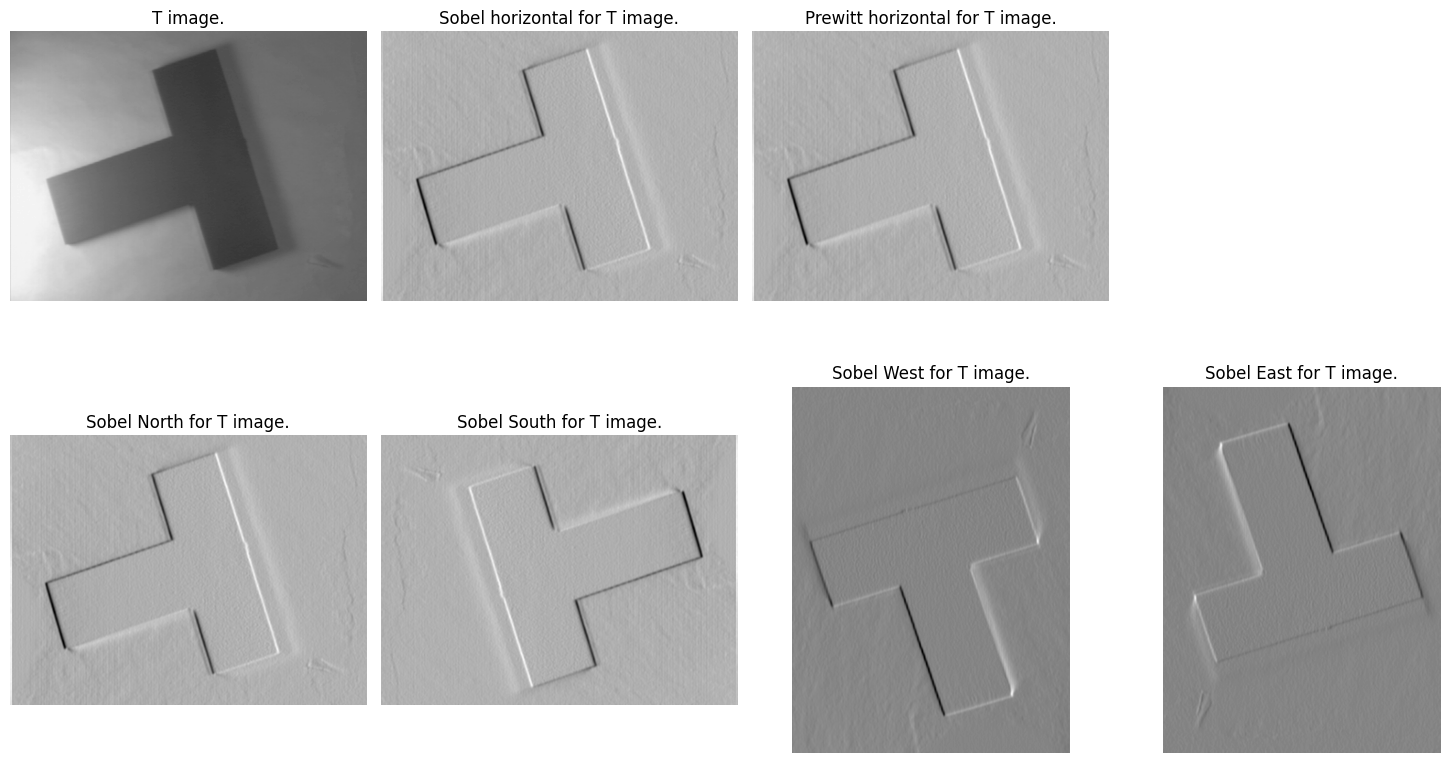

In [5]:
#Creating the grid for the graphs
fig = plt.figure(figsize=(15, 8))
gs = GridSpec(2, 4, figure=fig)

#First row with three columns
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

#Second row with four columns
ax4 = fig.add_subplot(gs[1, 0])  
ax5 = fig.add_subplot(gs[1, 1])  
ax6 = fig.add_subplot(gs[1, 2])
ax7 = fig.add_subplot(gs[1, 3])

#Plot
ax1.imshow(image_T, cmap='gray', norm=NoNorm())
ax1.set_title("T image.")
ax1.axis('off')

ax2.imshow(sobel_horiz_T, cmap='gray')
ax2.set_title("Sobel horizontal for T image.")
ax2.axis('off')

ax3.imshow(prewitt_horiz_T, cmap='gray')
ax3.set_title("Prewitt horizontal for T image.")
ax3.axis('off')

#Labels in different directions
axes = [ax4, ax5, ax6, ax7]
for i, (direction, result) in enumerate(sobel_kernels.items()):
    axes[i].imshow(result, cmap='gray')
    axes[i].set_title(f"Sobel {direction} for T image.")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

##### 1.2. Convolution
##### Apply these kernels to the image using *filter function* with ‘replicate’ option for boundary problem. In Python, you can achieve similar functionality using the *mode='nearest'* or *mode='reflect'* options in *scipy.ndimage.convolve* or *scipy.ndimage.generic_filter*. Take the maximum value on each pixel and create that way the output image.

In [8]:
#Resizing due to memory restructions
image_array_T = resize(image_array_T, (image_array_T.shape[0] // 2, image_array_T.shape[1] // 2))
#Application of the convolution for each direction
convolved_img_near = {}
for direction, kernel in sobel_kernels.items():
    convolved_img_near[direction] = convolve(image_array_T, kernel, mode='nearest')

#Combining results taking the maximum value on each pixel
output_img = np.maximum.reduce([img for img in convolved_img_near.values()])

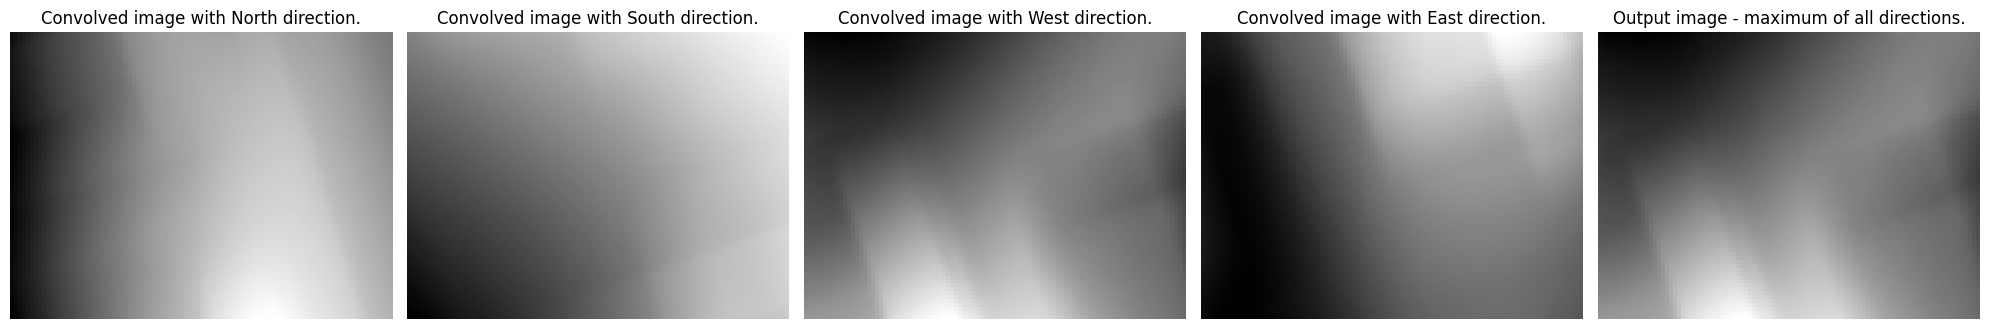

In [10]:
#Plot
fig, axs = plt.subplots(1, 5, figsize=(20, 10))
#Convolution results
for i, (direction, result) in enumerate(convolved_img_near.items()):
    axs[i].imshow(result, cmap='gray')
    axs[i].set_title(f"Convolved image with {direction} direction.")
    axs[i].axis('off')

axs[4].imshow(output_img, cmap='gray')
axs[4].set_title("Output image - maximum of all directions.")
axs[4].axis('off')

plt.tight_layout()
plt.show()

### 2. Gradient operator
##### 2.1. Magnitude
##### Use the gradient function on an image (for example T) to extract both Jx and Jy - partial derivatives along horizontal and vertical directions. Be careful to transform the image in double type if needed. Then use *sqrt* to compute the magnitude on each point and show the result using uint8 type.

$magnitude = \sqrt{J_{x}^2 + J_{y}^2}$

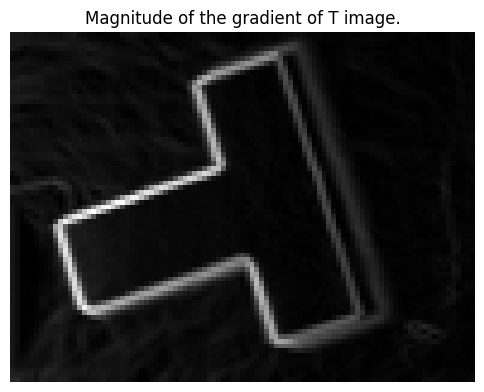

In [11]:
#We need the image in float format in order to have a precise calculation of the gradients
image_float_T = img_as_float(image_array_T)

#Calculating the partial derivatives on x (horiz.) and y (vert.)
Jx, Jy = np.gradient(image_float_T)

#Magnitude of the gradient
magnitude_T = np.sqrt(Jx**2 + Jy**2)

#Normalizing and converting into uint8 type
magnitude_T_uint8 = np.uint8(np.clip(magnitude_T * 255 / np.max(magnitude_T), 0, 255))

#Plot
plt.figure(figsize=(6, 6))
plt.imshow(magnitude_T_uint8, cmap='gray')
plt.title("Magnitude of the gradient of T image.")
plt.axis('off')
plt.show()

##### 2.2. Edge function
##### Use directly *“edge”* to extract edges in an image T with different options.

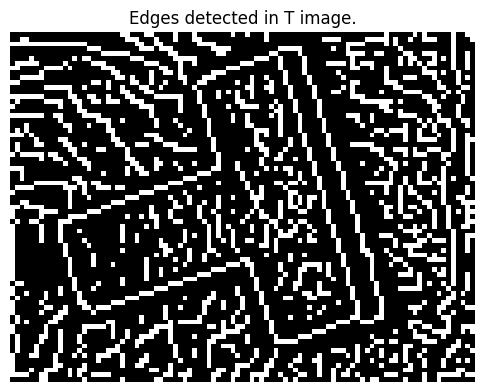

In [12]:
#Since edge() is a function of MatLab, here we use Canny.
#Calculation of the percentiles for the intensity values in normalized image
low_threshold = np.percentile(image_array_T, 10) #10%
high_threshold = np.percentile(image_array_T, 30) #30%

#Converting the image in uint8
image_T_uint8 = (image_array_T * 255).astype(np.uint8)

#Parameters for the function Canny
edges = cv2.Canny(image_T_uint8, threshold1=low_threshold, threshold2=high_threshold)

#Plot
plt.figure(figsize=(6, 6))
plt.imshow(edges, cmap='gray')
plt.title("Edges detected in T image.")
plt.axis('off')
plt.show()

##### 2.3. Gradient vector
##### To visualize better the gradient vectors, use the function *quiver*: 
    imagesc(I); colormap(gray)
    hold on
    for i=1:10:size(I,1)
    for j=1:10:size(I,2)
    quiver(j,i,Jx(i,j),Jy(i,j),'r')
    end
    end
    hold off

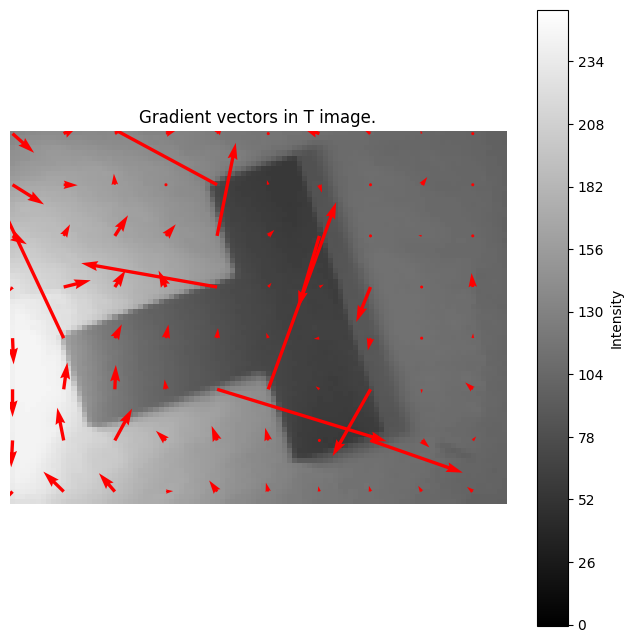

In [13]:
step=10 #Interval for the sampling (taken from the code of the task)

#Meshgrid for the points
x, y = np.meshgrid(np.arange(0, image_array_T.shape[1], step), 
                   np.arange(0, image_array_T.shape[0], step))

#Subsampling of the gradients
Jx_sub = Jx[::step, ::step]
Jy_sub = Jy[::step, ::step]

#Plot
plt.figure(figsize=(8, 8))
plt.imshow(image_array_T, cmap='gray', norm=NoNorm())
plt.colorbar(label="Intensity")
plt.title("Gradient vectors in T image.")
plt.axis('off')
#Adding the vectors of the gradients
plt.quiver(x, y, Jx_sub, -Jy_sub, color='red')
plt.show()

### 3. Spatial domain filtering 
##### 3.1. In order to filter an image in the spatial domain, one of the techniques is to perform a convolution of it with a mask. For this, you can use the function conv2 in the following manner: 
    H1=1/9*[1 1 1;1 1 1;1 1 1];
    filtI = conv2(I,H1);
##### Now, test the following filters and describe their effect on images:
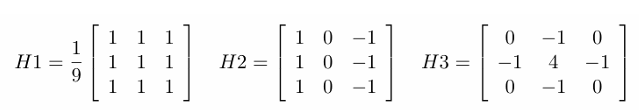
##### The filter H1 is called the averaging, the filter H2 is a vertical gradient, you can try the horizontal version and obtain all of the contours of the image. The filter H3 is the Laplacian, what is the advantage of it?

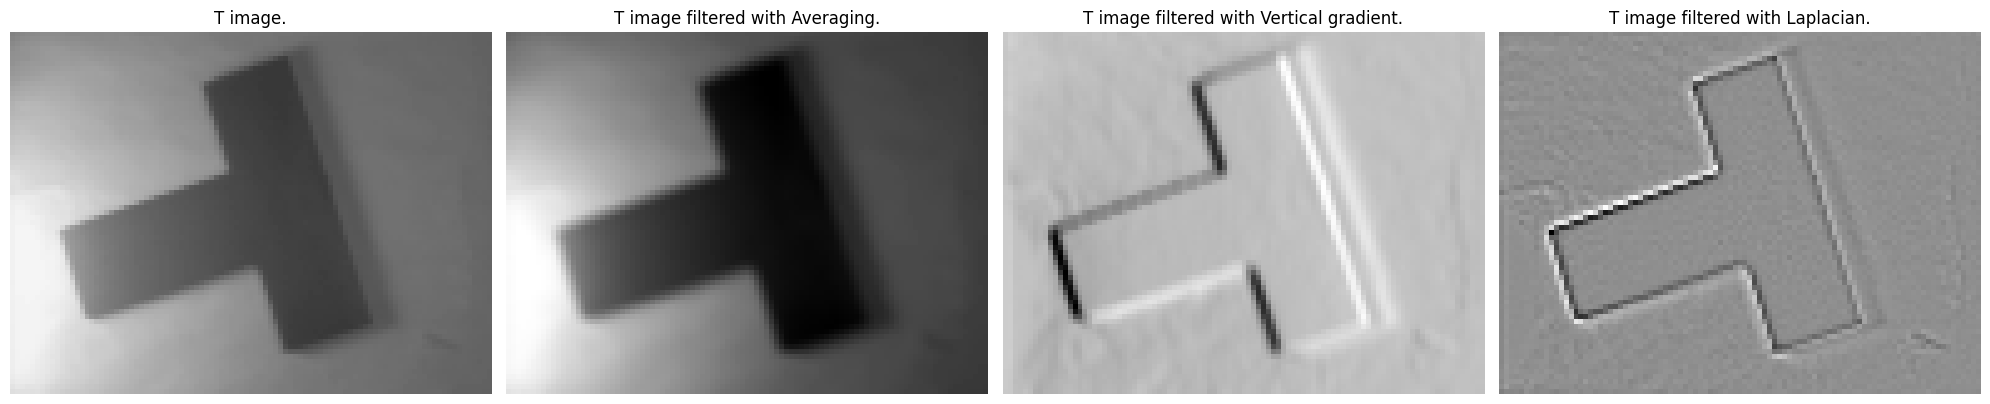

In [14]:
#Defining the three filters
#Averaging filter
H1 = (1/9)*np.array([[1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1]])
#Vertical gradient
H2 = np.array([[1, 0, -1],
               [1, 0, -1],
               [1, 0, -1]])
#Laplacian filter
H3 = np.array([[0, -1, 0],
               [-1, 4, -1],
               [0, -1, 0]])

#Applying filters using convolution
conv_H1 = convolve2d(image_array_T, H1, mode='same', boundary='symm')
conv_H2 = convolve2d(image_array_T, H2, mode='same', boundary='symm')
conv_H3 = convolve2d(image_array_T, H3, mode='same', boundary='symm')

#Plot
fig, axs = plt.subplots(1, 4, figsize=(20, 10))

axs[0].imshow(image_array_T, cmap='gray', norm=NoNorm())
axs[0].set_title("T image.")
axs[0].axis('off')

axs[1].imshow(conv_H1, cmap='gray')
axs[1].set_title("T image filtered with Averaging.")
axs[1].axis('off')

axs[2].imshow(conv_H2, cmap='gray')
axs[2].set_title("T image filtered with Vertical gradient.")
axs[2].axis('off')

axs[3].imshow(conv_H3, cmap='gray')
axs[3].set_title("T image filtered with Laplacian.")
axs[3].axis('off')

plt.tight_layout()
plt.show()

##### 3.2. Try the median filter, what effect does it have on the images? 
    J = imnoise(I,'salt & pepper',0.02);
    K = medfilt2(J);
    imshowpair(J,K,'montage')

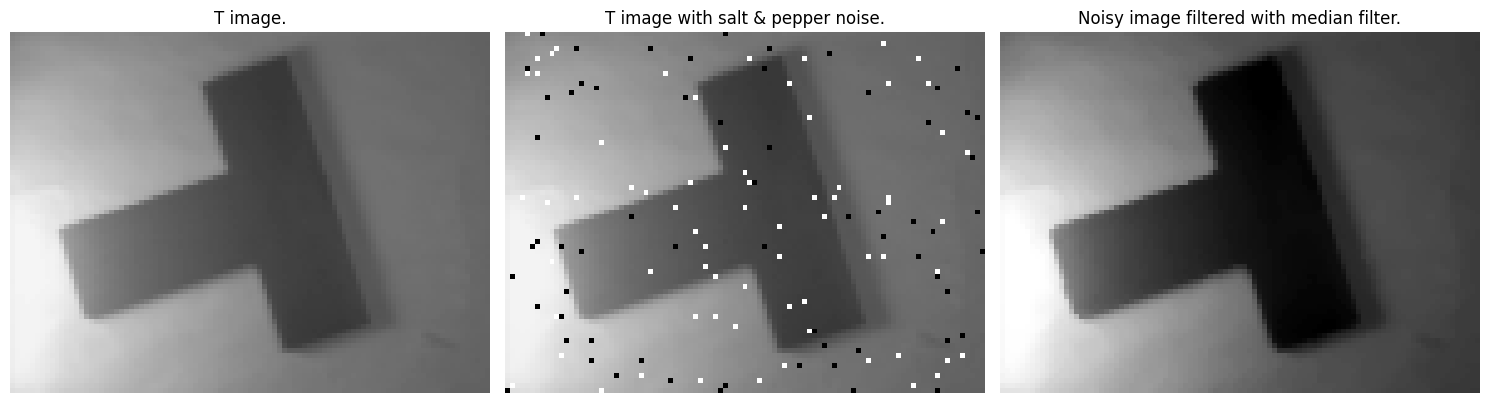

In [15]:
#Adding 'salt & pepper' noise
noisy_image_T = random_noise(image_T_uint8, mode='s&p', amount=0.02)  #amount=0.02 to simulate the noise
noisy_image_T = (noisy_image_T * 255).astype(np.uint8)  #Conversion in uint8

#Applying the median filter
med_filt_image_T = median_filter(noisy_image_T, size=3)

#Plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("T image.")
plt.imshow(image_array_T, cmap='gray', norm=NoNorm())
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("T image with salt & pepper noise.")
plt.imshow(noisy_image_T, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Noisy image filtered with median filter.")
plt.imshow(med_filt_image_T, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

##### 3.3. What filter would you use on the following images (lena1, lena2, lena3, lena4) to filter/enhance them?
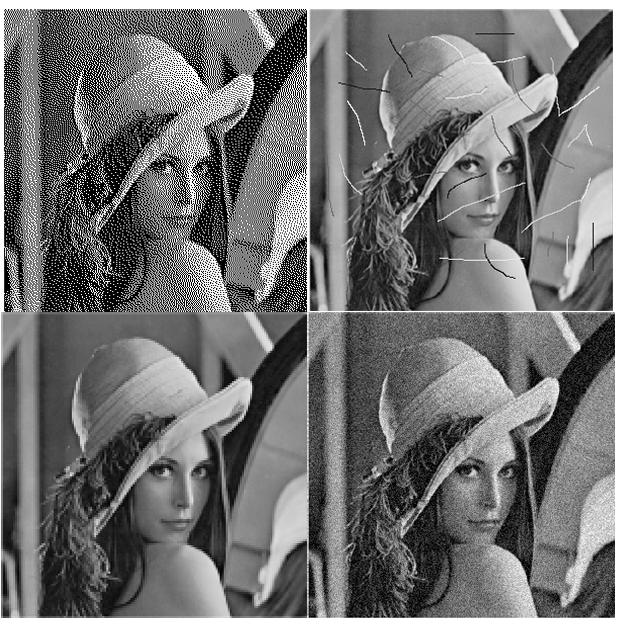

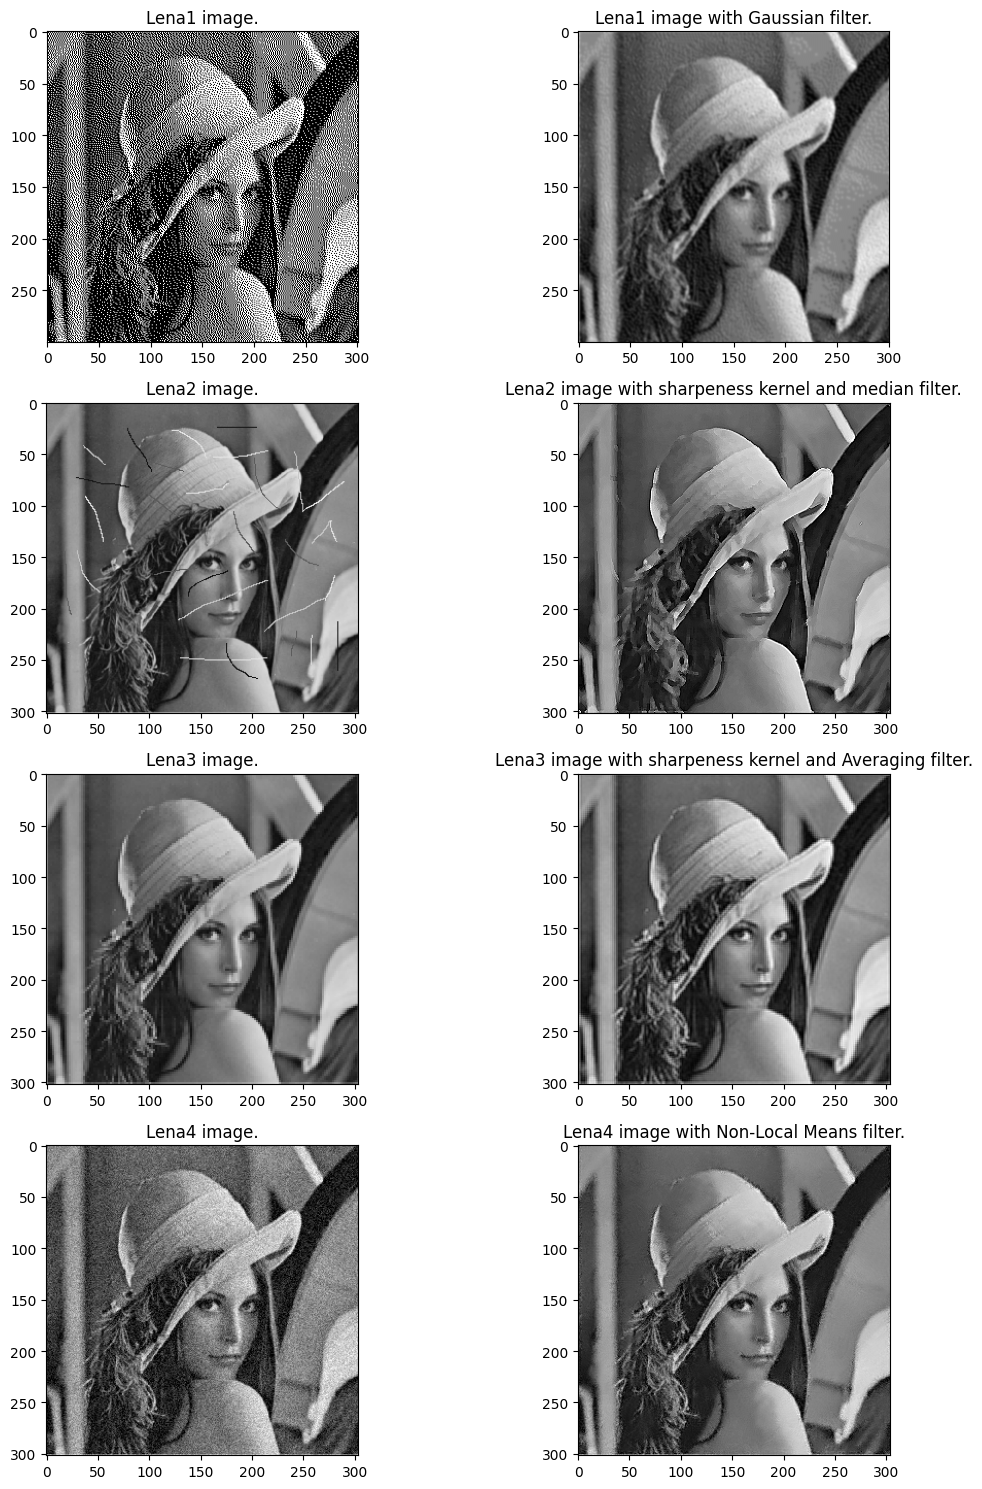

In [ ]:
#Load images
image_lena1 = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 6 - IP\\IP6\\IP6\\lena1.tif").convert('L')
image_lena2 = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 6 - IP\\IP6\\IP6\\lena2.tif").convert('L')
image_lena3 = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 6 - IP\\IP6\\IP6\\lena3.tif").convert('L')
image_lena4 = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 6 - IP\\IP6\\IP6\\lena4.tif").convert('L')

#To array
image_array_lena1 = np.array(image_lena1)
image_array_lena2 = np.array(image_lena2)
image_array_lena3 = np.array(image_lena3)
image_array_lena4 = np.array(image_lena4)

#To lena1: gaussian filter
gauss_lena1 = gaussian_filter(image_array_lena1, sigma=1.2)
#To lena2: sharpeness kernel and median filter --> the image has salt & pepper noise.
med_lena2 = median_filter(image_array_lena2, 5) #median filter
kernel_sharpness = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) #kernel
med_lena2 = cv2.filter2D(med_lena2, -1, kernel) #sharpen the image
#To lena3: sharpeness kernel and averaging filter  
sharpened_lena3 = cv2.filter2D(image_array_lena3, -1, kernel) #sharpen the image
conv_lena3 = convolve2d(sharpened_lena3, H1, mode='same', boundary='symm') #averaging filter
#To lena4: NLM algorithm
conv_H2_lena4 = cv2.fastNlMeansDenoising(image_array_lena4, h=14)

#Plot
fig, axs = plt.subplots(4,2, figsize=(12, 15))

axs[0,0].imshow(image_lena1, cmap='gray', norm=NoNorm())
axs[0,0].set_title("Lena1 image.")
axs[0,1].imshow(gauss_lena1, cmap='gray')
axs[0,1].set_title("Lena1 image with Gaussian filter.")

axs[1,0].imshow(image_lena2, cmap='gray', norm=NoNorm())
axs[1,0].set_title("Lena2 image.")
axs[1,1].imshow(med_lena2, cmap='gray')
axs[1,1].set_title("Lena2 image with sharpeness kernel and median filter.")

axs[2,0].imshow(image_lena3, cmap='gray', norm=NoNorm())
axs[2,0].set_title("Lena3 image.")
axs[2,1].imshow(conv_lena3, cmap='gray')
axs[2,1].set_title("Lena3 image with sharpeness kernel and Averaging filter.")

axs[3,0].imshow(image_lena4, cmap='gray', norm=NoNorm())
axs[3,0].set_title("Lena4 image.")
axs[3,1].imshow(conv_H2_lena4, cmap='gray')
axs[3,1].set_title("Lena4 image with Non-Local Means filter.")

plt.tight_layout()
plt.show()